# Abgabe 5
Aufgabe 2

In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import time

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
import csv
wine_path = "winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
skiprows=1)
wineq = torch.tensor(wineq_numpy)
NNin = wineq[:,:-1]
NNout = wineq[:,11]

t_c = NNout
t_u = NNin
t_c = torch.tensor(t_c).unsqueeze(1)
t_u.shape

C:\Users\karol\AppData\Local\Temp\ipykernel_23728\481299755.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_c = torch.tensor(t_c).unsqueeze(1)


torch.Size([4898, 11])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 889, 1521,  ...,  194, 4181]),
 tensor([3594, 4781, 3967, 1758,  952,  302, 4554, 4833,  908, 2442, 3411,
         1635,  616, 2549, 4074, 3573, 4433, 1184,  892, 3584,  711,   39,
         3932, 4476, 1947, 3737, 3292, 4122,  294, 2457,  588, 3322,  703,
         4445, 1158, 4273,  820, 1402, 2417, 4187,  778, 2703, 3742, 2285,
         3555,  435, 1204, 1676, 3692, 3261, 1089, 4628, 4289, 1150, 3850,
         3436, 4215, 1680, 3114, 2685, 4852, 3331, 1802, 4836, 4642, 2708,
         4106, 3537, 3891, 4602, 1186,  808, 1485, 1774,  451, 3888, 3909,
         4706, 4505, 1473, 3111, 2350, 4592, 1550, 4788, 2055, 3775, 2865,
         3928, 2438,  646, 3627, 2771, 2778,  312, 2286, 4756,  113, 2389,
         1699, 2462, 1531, 4404,  863, 2513, 2577, 2519, 2726, 3050,  563,
         1081, 4380, 4780, 1586, 1739,  984, 4023,  989, 2009,  730, 2877,
         2396, 1373, 1989,  531, 1275,  368,   54, 4099, 4841, 3289, 4053,
          825, 3472, 2433, 3504, 1780,  925,  818, 1997, 18

In [5]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]


t_un_train = t_u_train
t_un_val = t_u_val

for i in range (0,11):
    t_un_train[:, i] = t_u_train[:,i]/torch.max(t_u_train[:,i])
    t_un_val[:, i] = t_u_val[:,i]/torch.max(t_u_val[:,i])

In [6]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    loss_Nvall = []
    loss_Ntrain = []
    epoch_new = []
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        loss_Nvall.append(loss_val) 
        loss_Ntrain.append(loss_train) 
        epoch_new.append(epoch)

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
    return loss_Nvall, loss_Ntrain, epoch_new

In [7]:
from collections import OrderedDict

neuron_count = 500
input_size = 11
output_size = 1

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(input_size, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, output_size))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

start_time = time.time()
loss_v, loss_t, epoch = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
end_time = time.time()
execution_time = end_time - start_time

Epoch 1, Training loss 34.6488, Validation loss 34.1157
Epoch 1000, Training loss 0.6992, Validation loss 0.7205
Epoch 2000, Training loss 0.6614, Validation loss 0.6504
Epoch 3000, Training loss 0.6379, Validation loss 0.6142
Epoch 4000, Training loss 0.6224, Validation loss 0.5942
Epoch 5000, Training loss 0.6116, Validation loss 0.5821


execution_time = 182.98120307922363 s


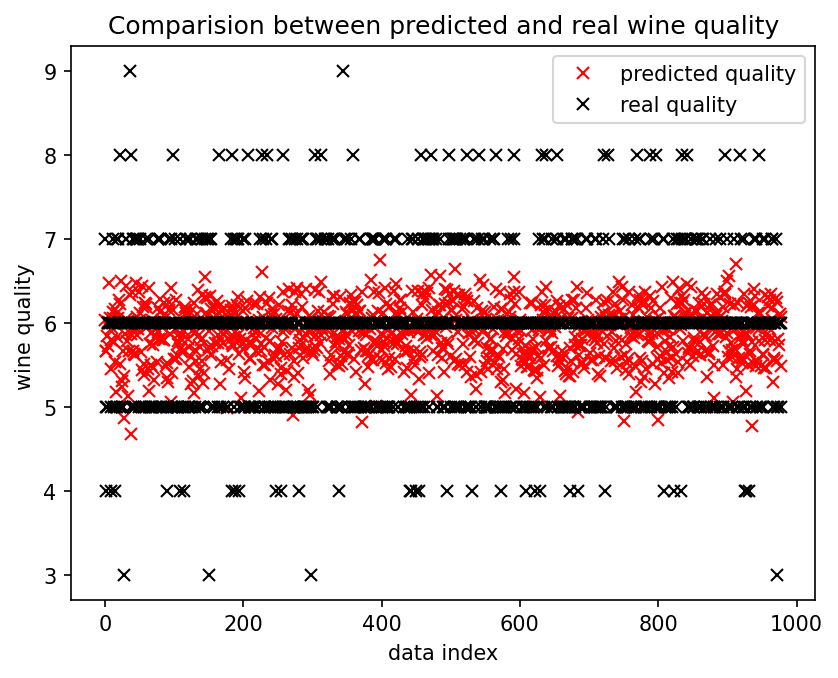

In [8]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=150)
plt.xlabel("data index")
plt.ylabel("wine quality ")
plt.plot( seq_model(t_u_val).detach().numpy(), 'rx',label='predicted quality')
plt.plot( t_c_val.detach().numpy(), 'kx',label='real quality')
plt.legend()
plt.title("Comparision between predicted and real wine quality")
print('execution_time =',execution_time,'s')


execution_time = 182.98120307922363 s


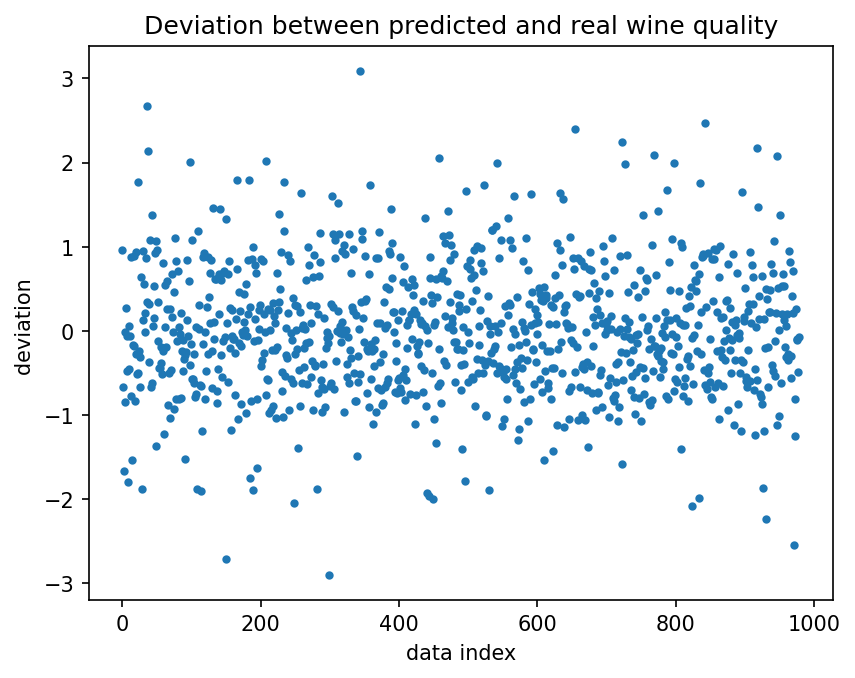

In [9]:
fig = plt.figure(dpi=150)
plt.xlabel("data index")
plt.ylabel("deviation ")
plt.plot( t_c_val.detach().numpy() - seq_model(t_u_val).detach().numpy(), '.')

plt.title("Deviation between predicted and real wine quality")
print('execution_time =',execution_time,'s')

Text(0.5, 1.0, 'Comparision between validation loss and training loss')

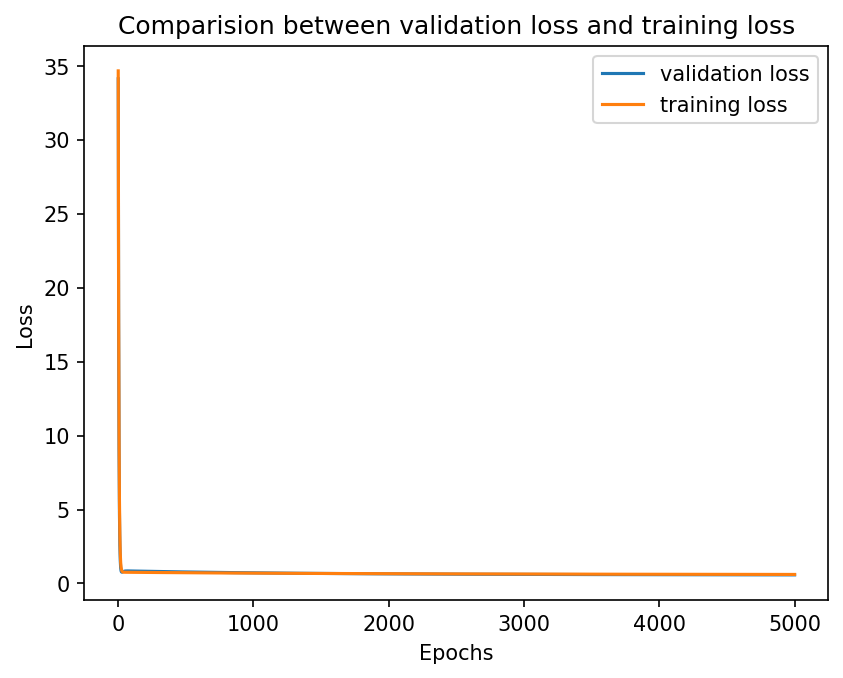

In [11]:
epoch = torch.Tensor(epoch)
loss_v = torch.Tensor(loss_v)
loss_t = torch.Tensor(loss_t)

fig = plt.figure(dpi=150)
plt.plot(epoch,loss_v, label='validation loss')
plt.plot(epoch,loss_t, label='training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Comparision between validation loss and training loss")


Wie lange dauert es das Netzwerk zu trainieren? $\newline$
Das Training dauert, bei 5000 Epochen, 500 Neuronen und einer Learning Rate von 1e-3 ca. 180s (3min). 
$\newline$$\newline$

Welche Faktoren spielen bei der Trainingsdauer eine Rolle?$\newline$
Bei der Trainingsdauer spielen unter anderem die Anzahl der Epochen, die Anzahl der Neuronen, die Größe des zu trainierenden Datensatzes, die Anzahl der Layer, die zur Verfügung stehende CPU und GPU, der Grad der Vorverarbeitung der Daten, der Optimierungsalgorithmus und die Learning Rate eine Rolle.